<a href="https://colab.research.google.com/github/louis-sanna-eki/graph-generation/blob/master/notebooks/CO2_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction

In this notebook, we demonstrate several methods for constructing a graph from a CSV file.

- in Python using matplotlib
- in pygwalker UI

### Setup

Connect to gdrive, install dependencies, load dependencies, set config.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install matplotlib
!pip install pandas
!pip install plotly
!pip install kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [3]:
PATH_TO_CO2_FILE = '/content/drive/My Drive/lr-data/graph-generation/owd-co2.csv'

### Matplotlib

Famous python library to make charts, the two rivals are plotly and seaborn.

https://matplotlib.org/

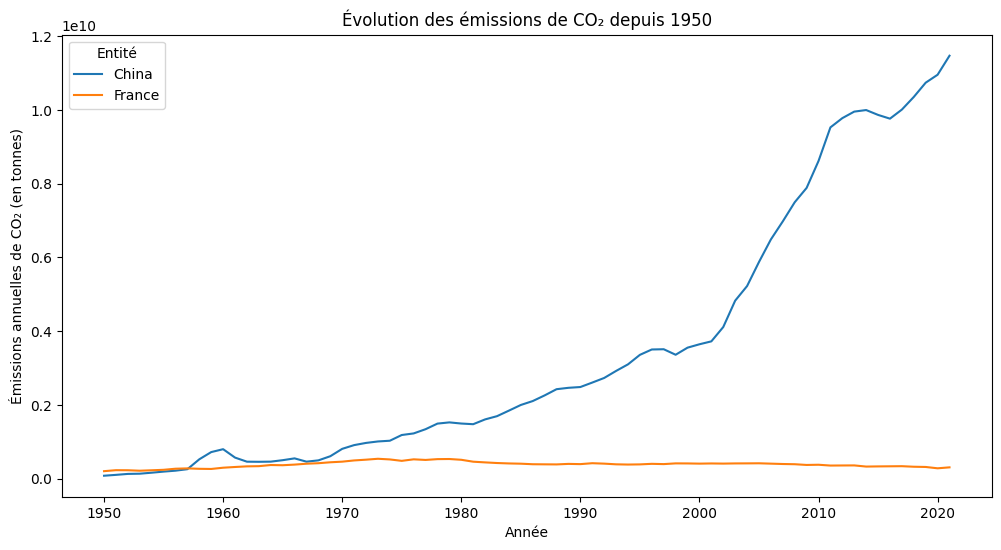

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from Google Drive
data = pd.read_csv(PATH_TO_CO2_FILE, delimiter=';')

# Filter data for years since 1950 and specified entities
filtered_data = data[(data['Year'] >= 1950) & (data['Entity'].isin(["France", "China"]))]

# Group data by year and entity
grouped_data = filtered_data.groupby(['Year', 'Entity'])['Annual CO₂ emissions'].sum().unstack()

# Create the plot
plt.figure(figsize=(12, 6))
for entity in grouped_data.columns:
    plt.plot(grouped_data.index, grouped_data[entity], label=entity)

# Adding labels, title, and legend in French
plt.xlabel('Année')
plt.ylabel('Émissions annuelles de CO₂ (en tonnes)')
plt.title('Évolution des émissions de CO₂ depuis 1950')
plt.legend(title='Entité')

# Show the plot
plt.show()


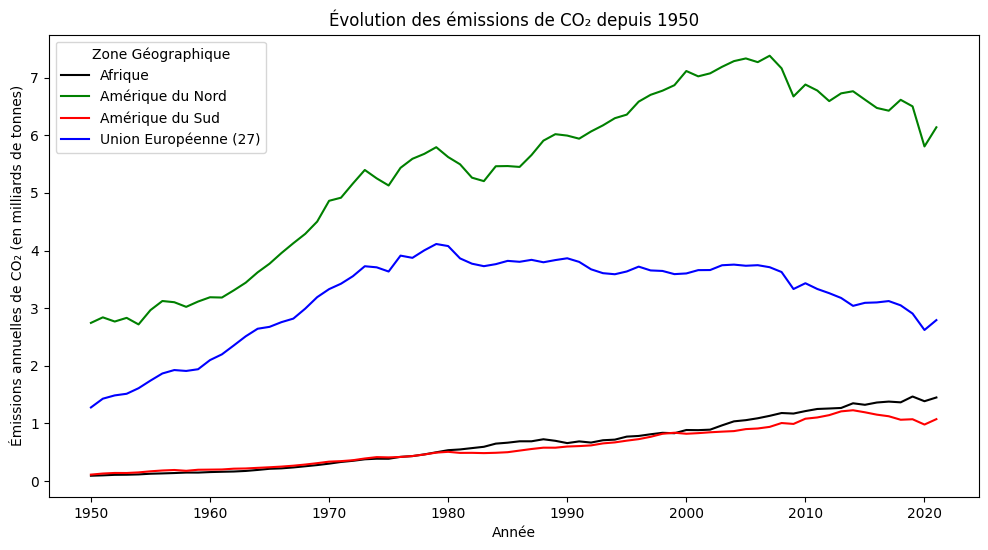

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from Google Drive
data = pd.read_csv(PATH_TO_CO2_FILE, delimiter=';')

# Filter data for years since 1950 and specified entities
entities = ["Africa", "European Union (27)", "North America", "South America"]
filtered_data = data[(data['Year'] >= 1950) & (data['Entity'].isin(entities))]

# Group data by year and entity
grouped_data = filtered_data.groupby(['Year', 'Entity'])['Annual CO₂ emissions'].sum().unstack()

# Define specific colors for each continent
colors = {"Africa": "black", "European Union (27)": "blue", "North America": "green", "South America": "red"}

# Translation dictionary for entity names
entity_translations = {
    "Africa": "Afrique",
    "European Union (27)": "Union Européenne (27)",
    "North America": "Amérique du Nord",
    "South America": "Amérique du Sud"
}

# Sort entities by French alphabetical order
sorted_entities = sorted(entity_translations.keys(), key=lambda x: entity_translations[x])

# Create the plot
plt.figure(figsize=(12, 6))
for entity in sorted_entities:
    translated_entity = entity_translations[entity]
    plt.plot(grouped_data.index, grouped_data[entity]/1e9, label=translated_entity, color=colors[entity])

# Adding labels, title, and legend in French
plt.xlabel('Année')
plt.ylabel('Émissions annuelles de CO₂ (en milliards de tonnes)')
plt.title('Évolution des émissions de CO₂ depuis 1950')
plt.legend(title='Zone Géographique')

# Show the plot
plt.show()


### ploty




In [6]:
import pandas as pd
import plotly.graph_objects as go

# Charger les données
data = pd.read_csv(PATH_TO_CO2_FILE, delimiter=';')

# Filtrer les données pour les années depuis 1950 et les entités spécifiées
entities = ["Africa", "European Union (27)", "North America", "South America"]
filtered_data = data[(data['Year'] >= 1950) & (data['Entity'].isin(entities))]

# Regrouper les données par année et entité
grouped_data = filtered_data.groupby(['Year', 'Entity'])['Annual CO₂ emissions'].sum().unstack()

# Définir des couleurs spécifiques pour chaque continent
colors = {"Africa": "black", "European Union (27)": "blue", "North America": "green", "South America": "red"}

# Dictionnaire de traduction pour les noms des entités
entity_translations = {
    "Africa": "Afrique",
    "European Union (27)": "Union Européenne (27)",
    "North America": "Amérique du Nord",
    "South America": "Amérique du Sud"
}

# Trier les entités par ordre alphabétique français
sorted_entities = sorted(entity_translations.keys(), key=lambda x: entity_translations[x])

# Créer le graphique Plotly
fig = go.Figure()

for entity in sorted_entities:
    translated_entity = entity_translations[entity]
    fig.add_trace(go.Scatter(x=grouped_data.index, y=grouped_data[entity]/1e9,
                             mode='lines', name=translated_entity,
                             line=dict(color=colors[entity])))

# Ajouter des labels, un titre et une légende en français
fig.update_layout(
    title='Évolution des émissions de CO₂ depuis 1950',
    xaxis_title='Année',
    yaxis_title='Émissions annuelles de CO₂ (en milliards de tonnes)',
    legend_title='Zone Géographique'
)

# Afficher le graphique
fig.show()


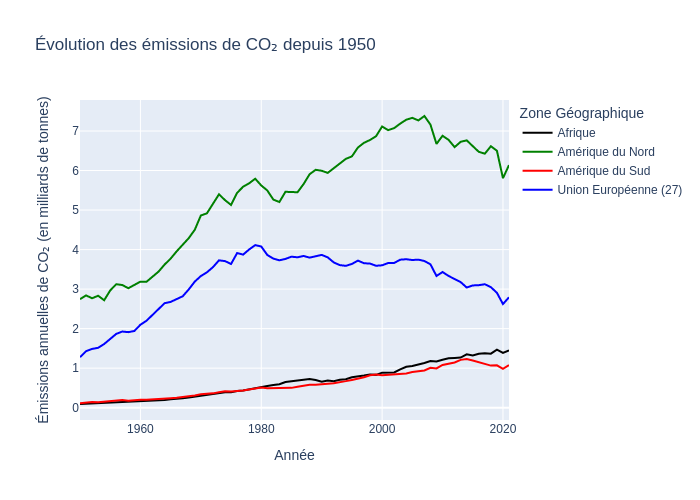

In [7]:
from IPython.display import Image

# Convert to PNG
img_bytes = fig.to_image(format="png")

# Show png
Image(img_bytes)

### Styles

Here we test all the default styles of matplotlib.

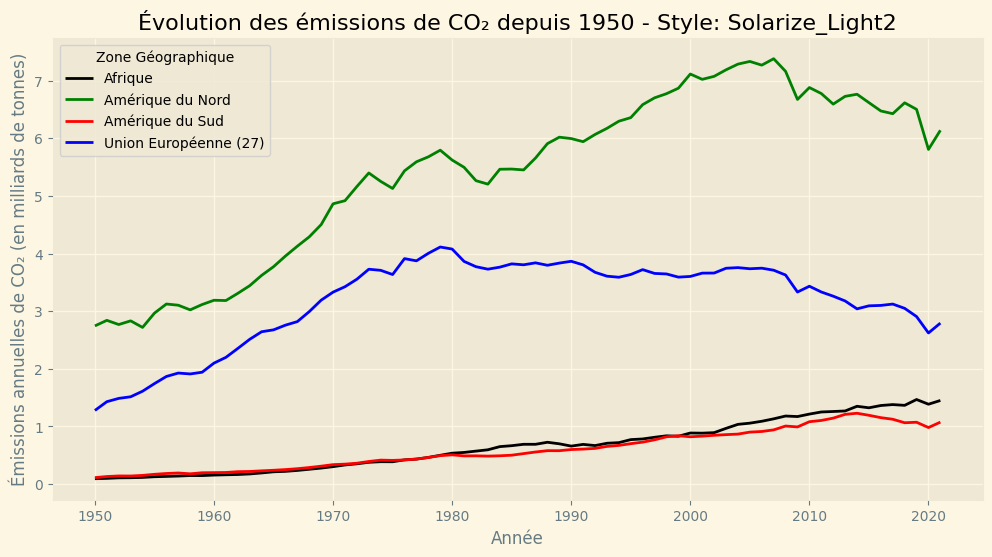

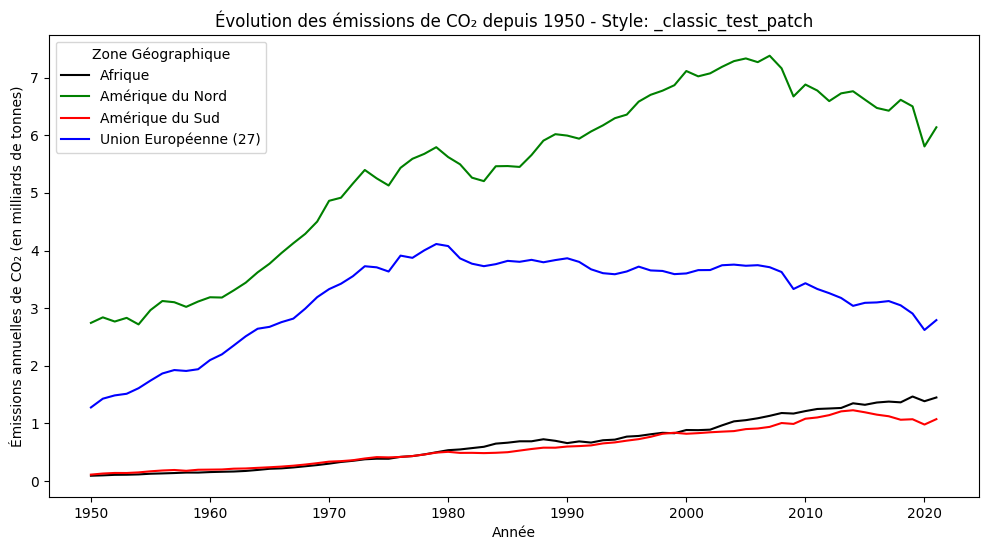

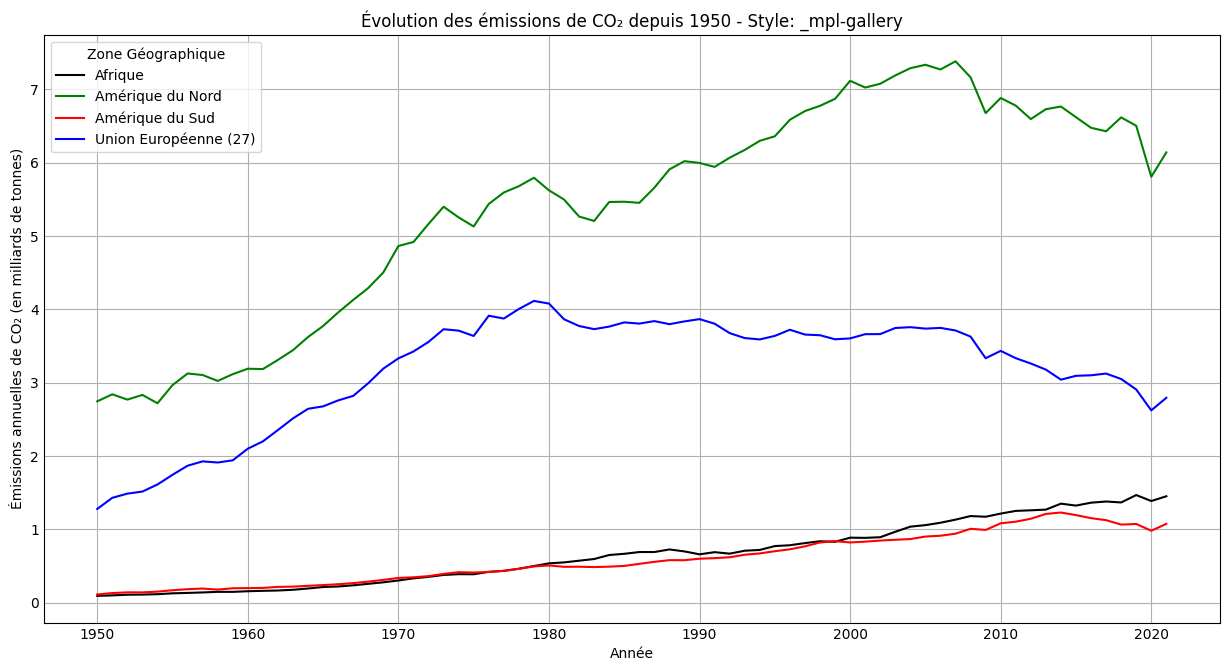

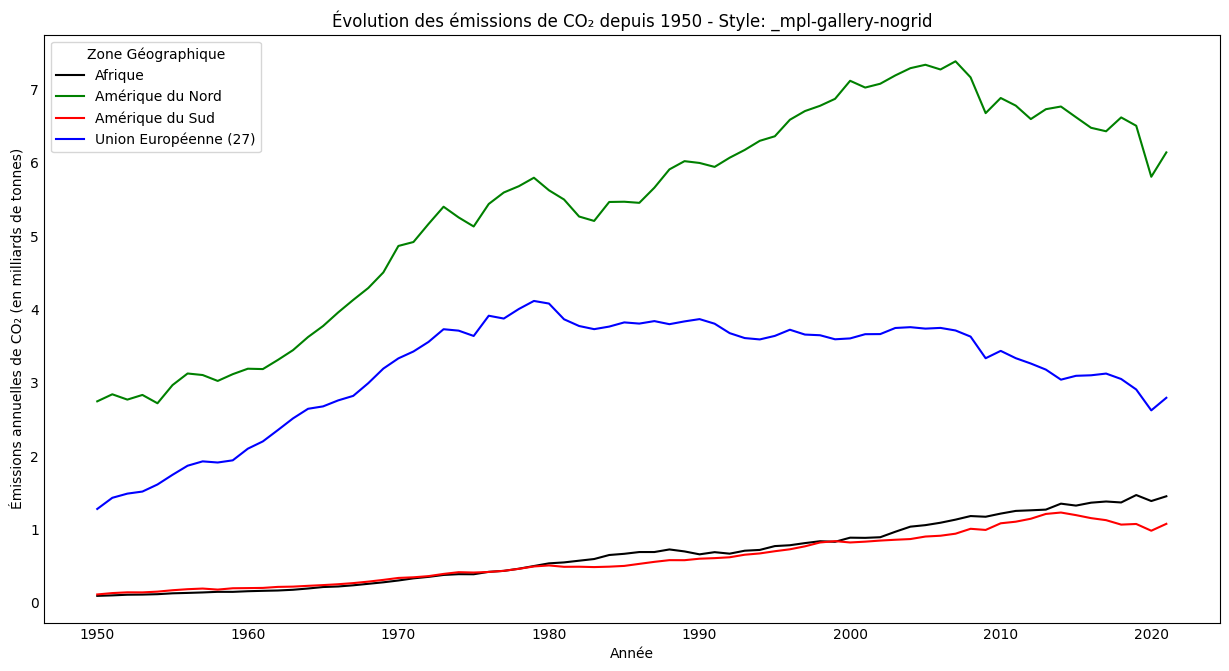

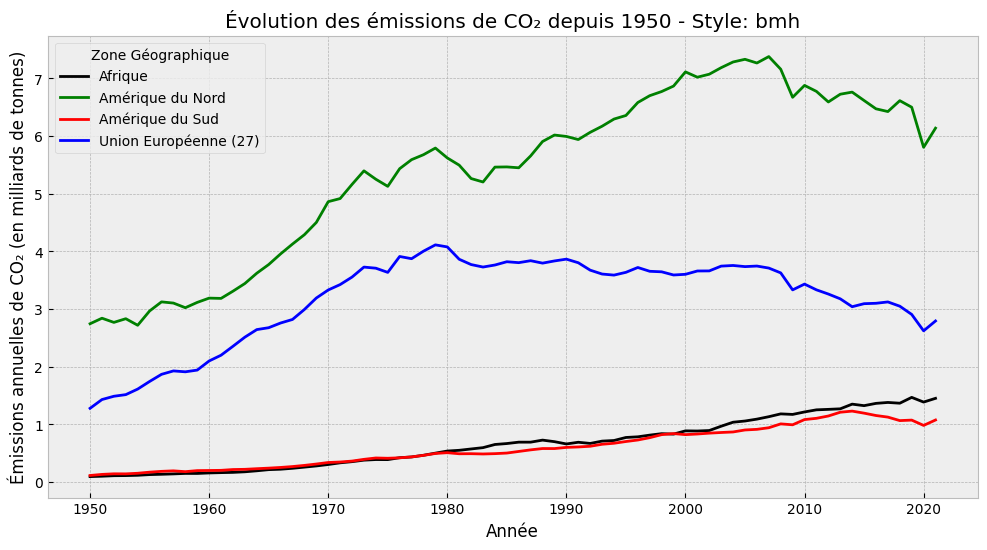

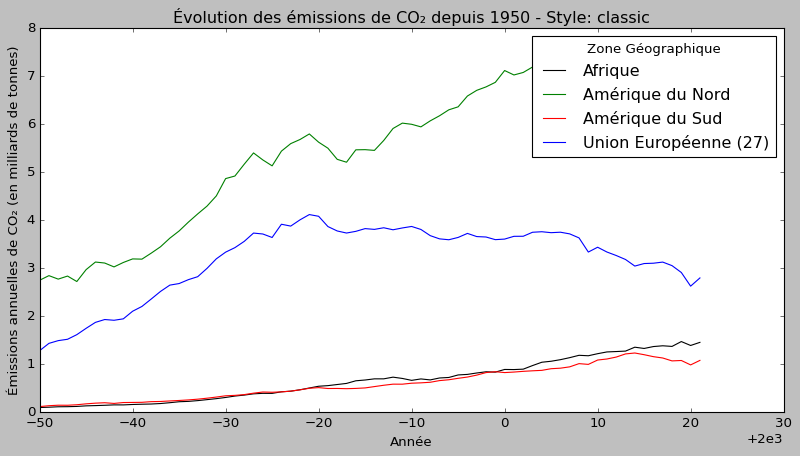

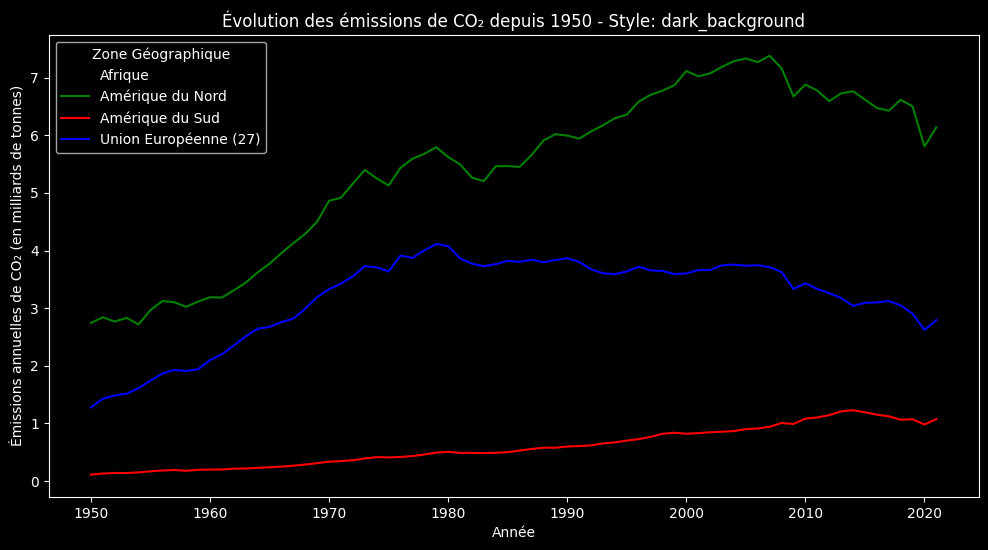

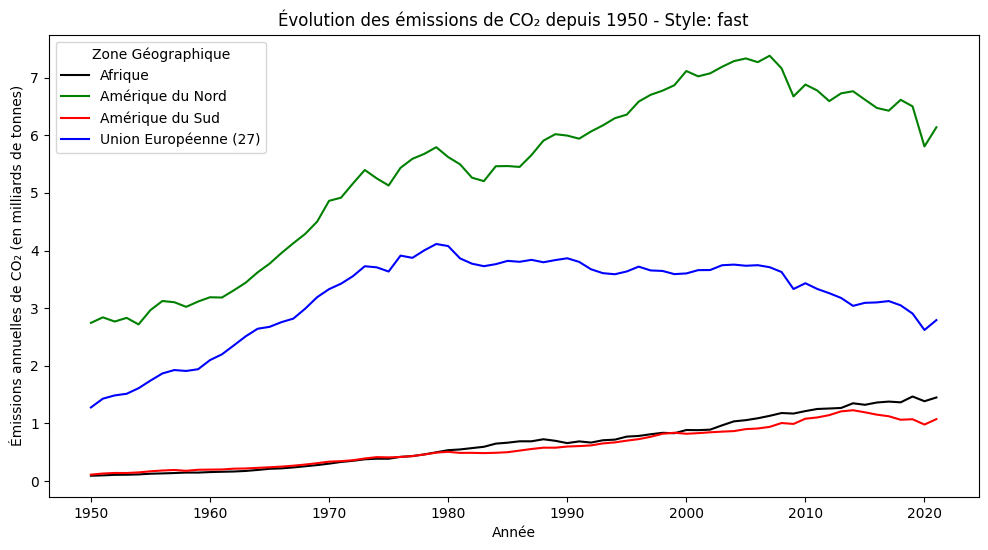

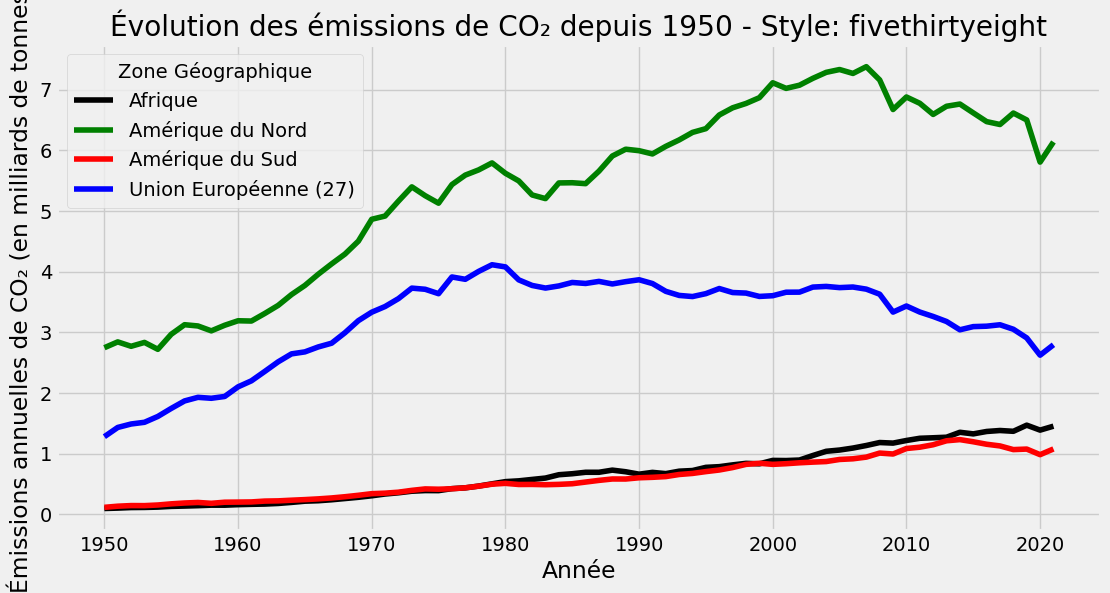

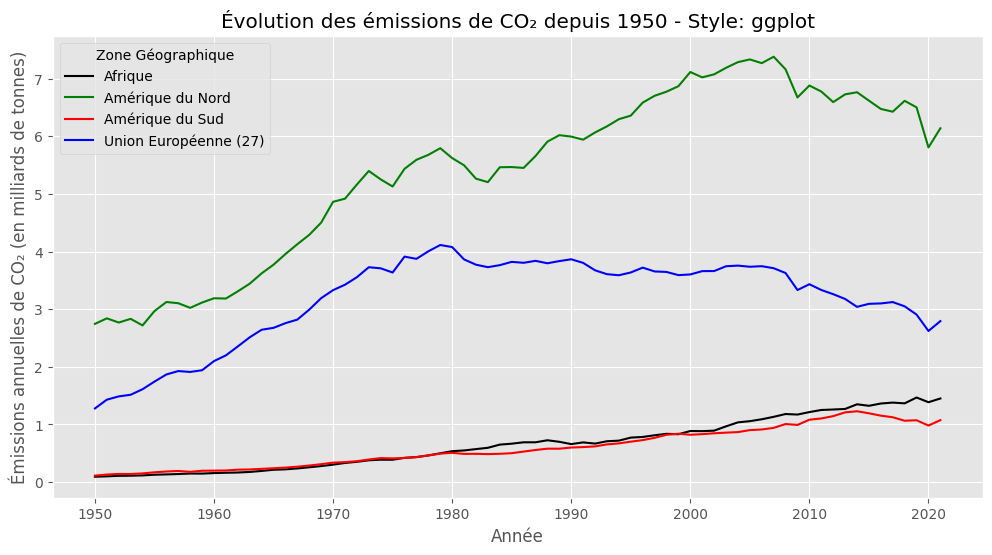

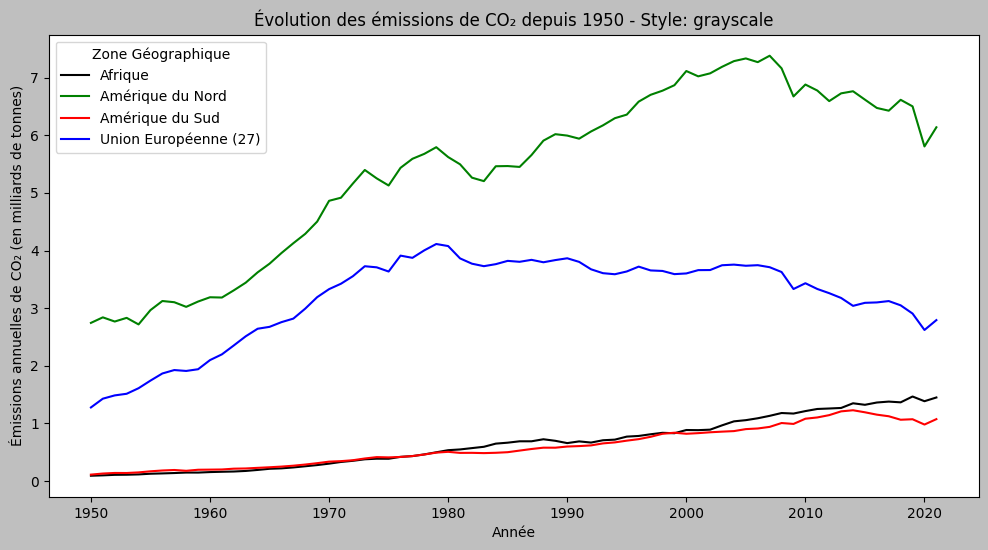

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.



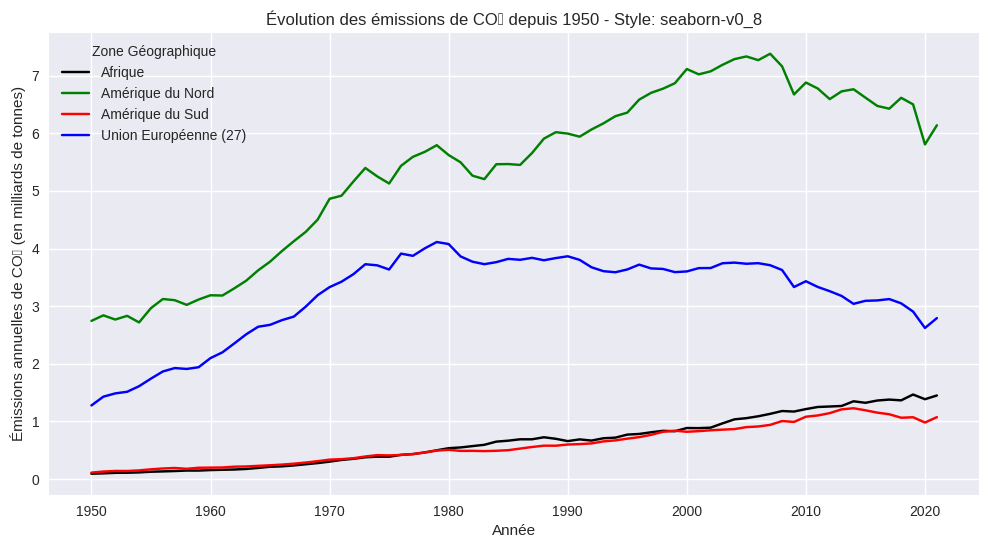

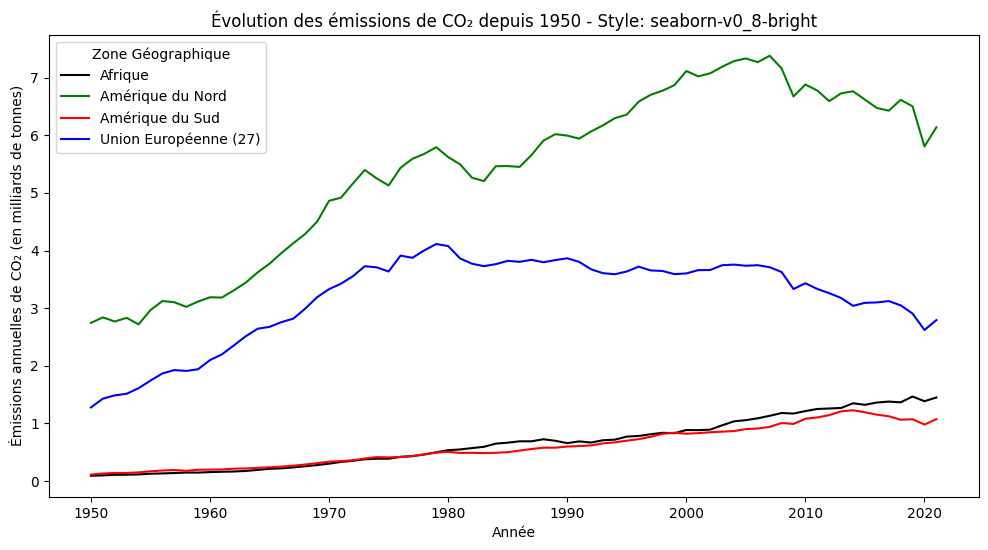

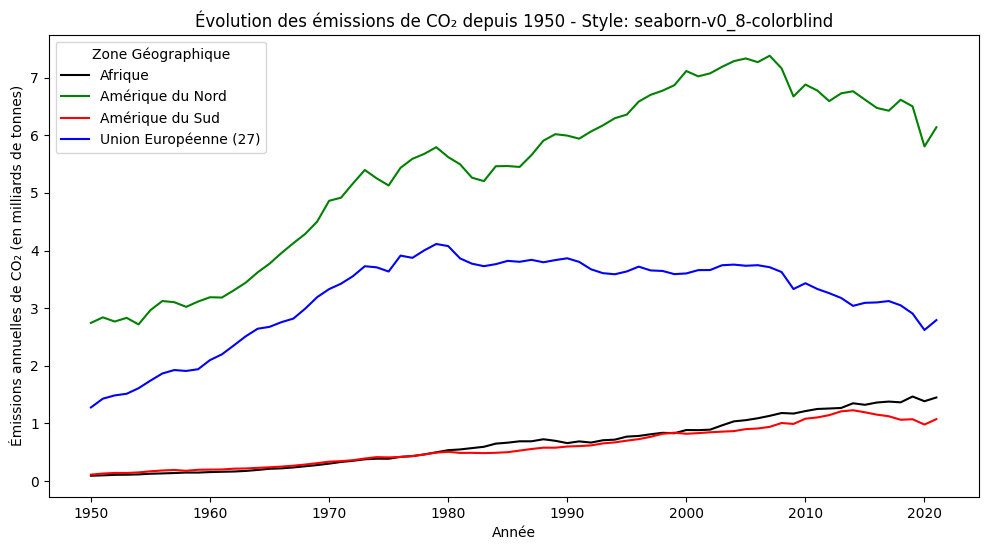

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.



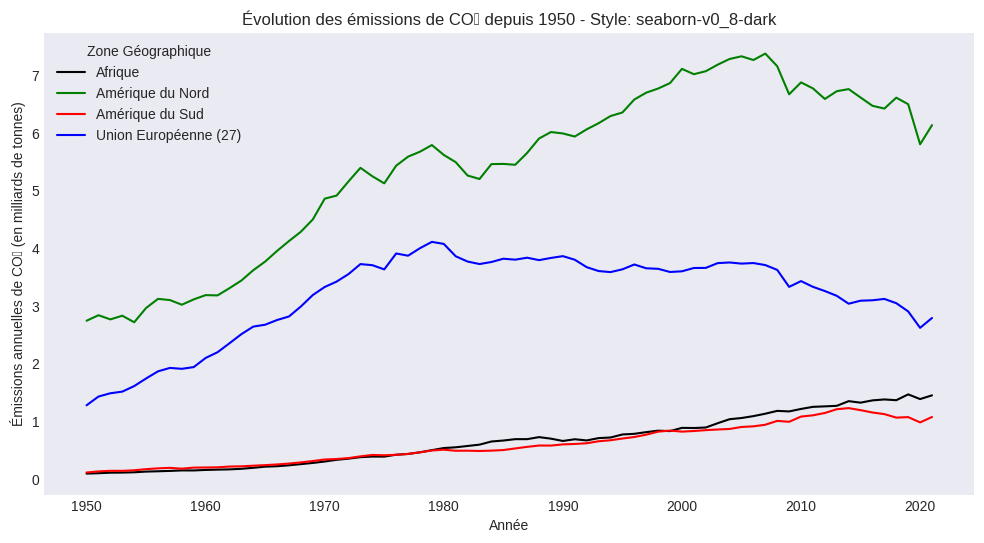

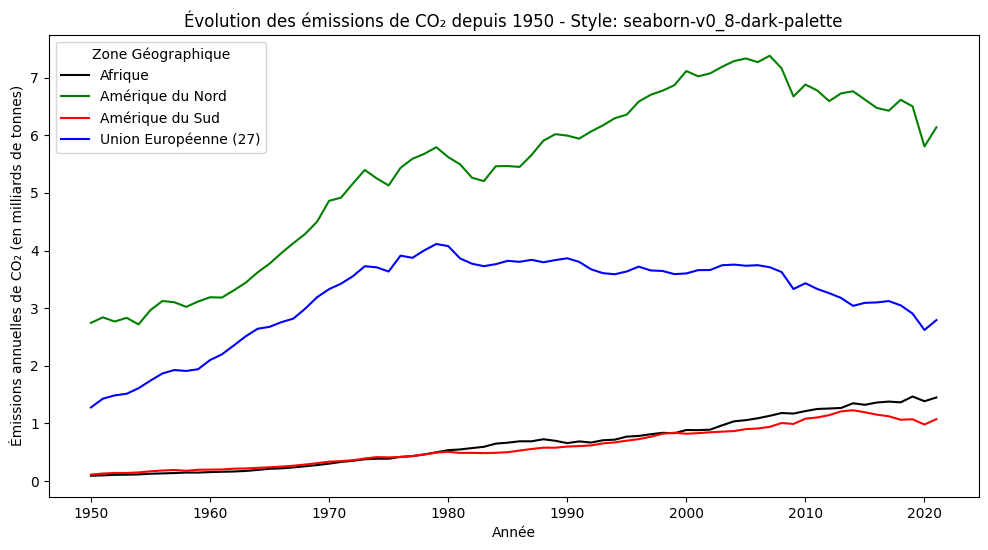

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.



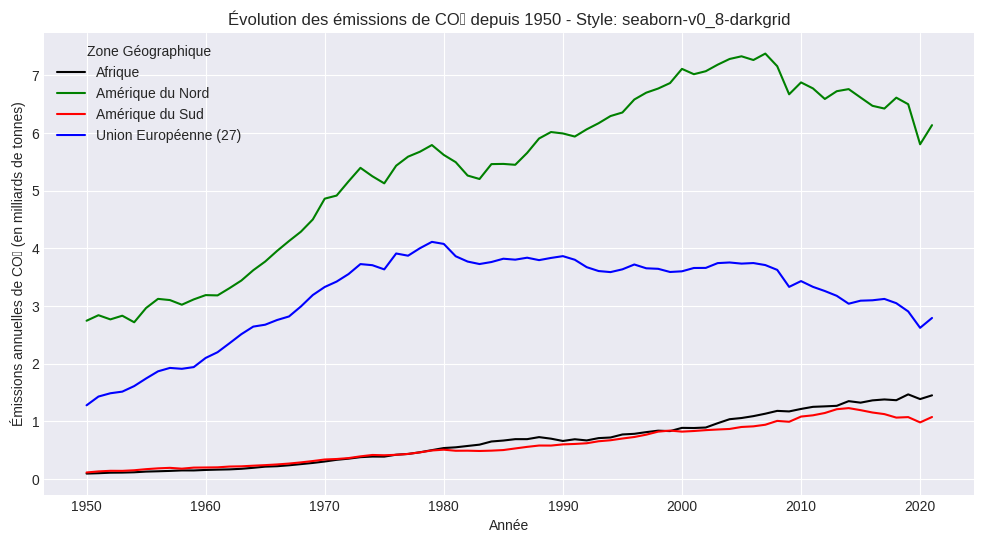

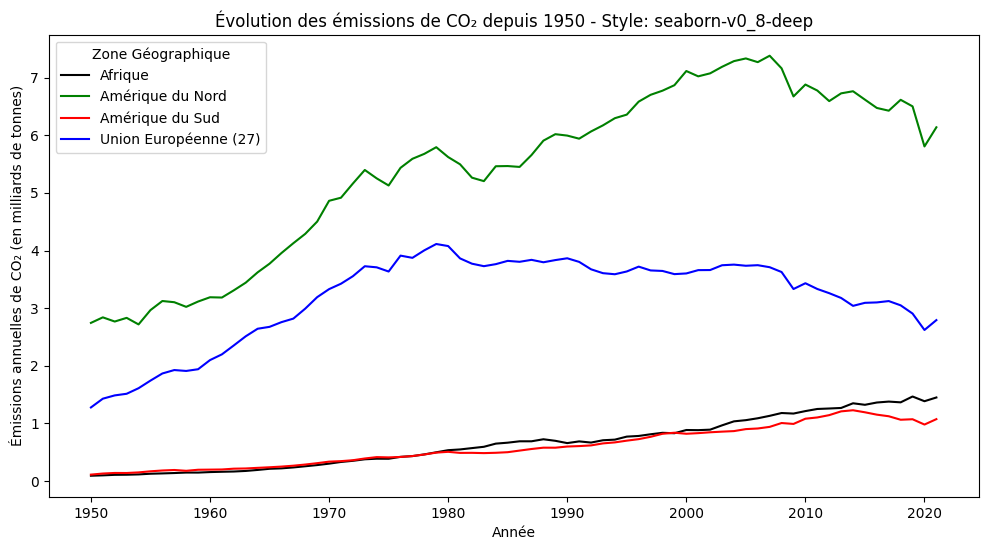

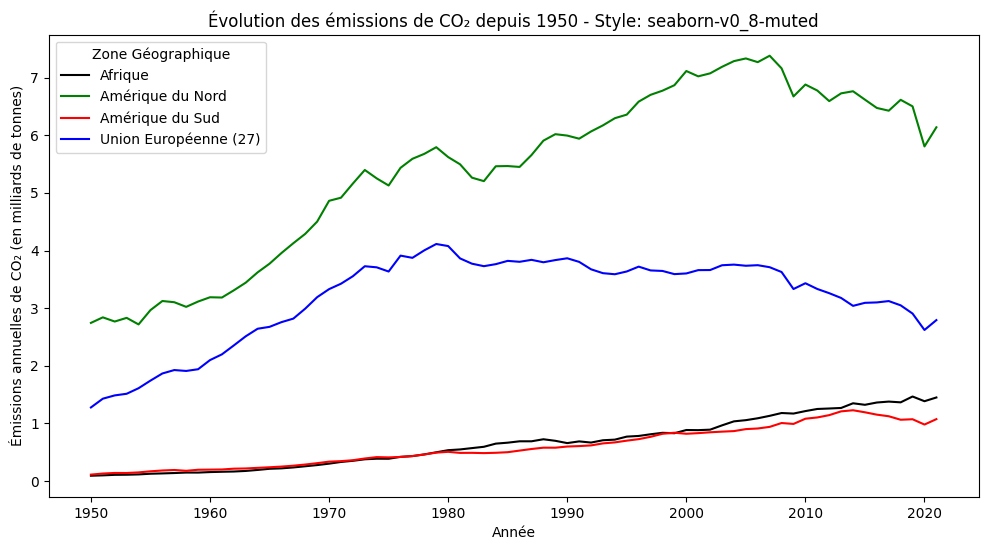

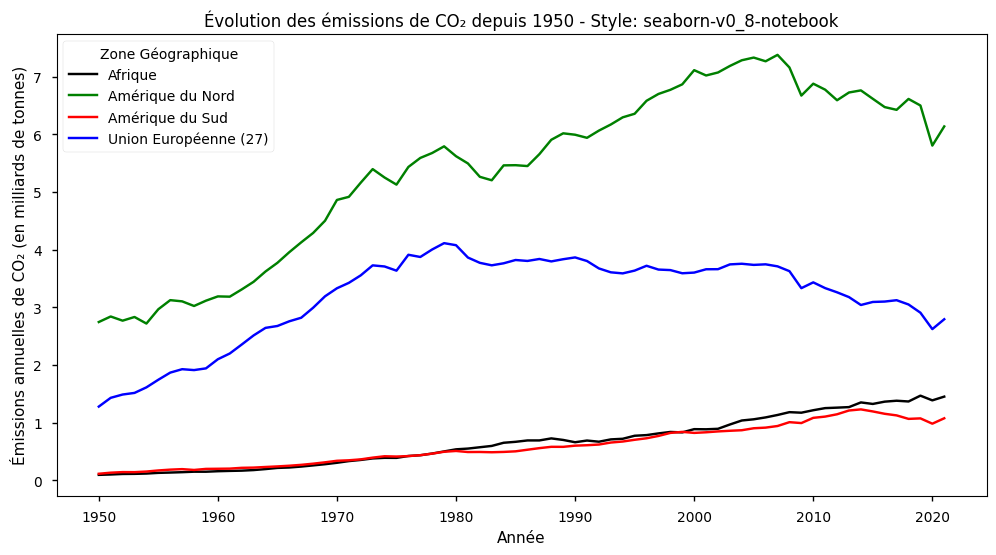

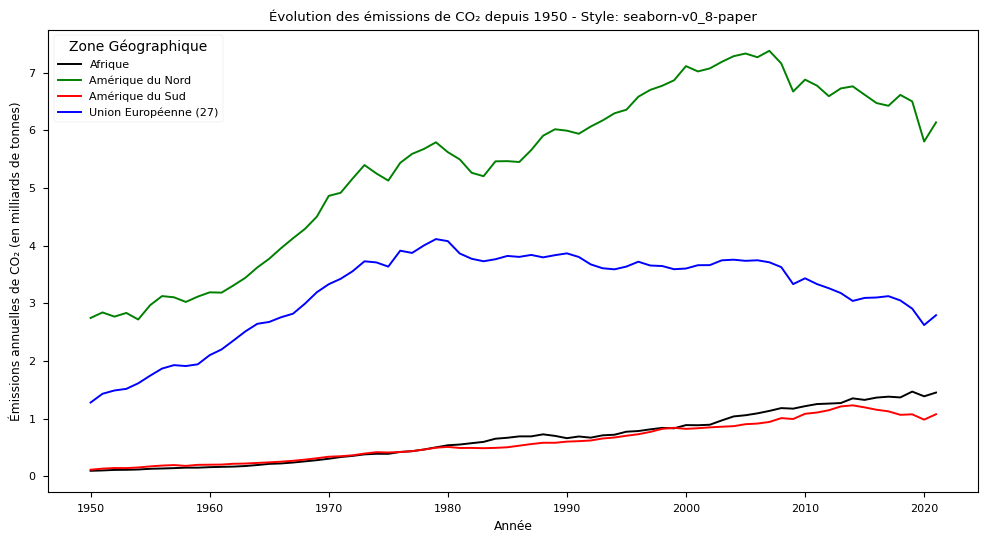

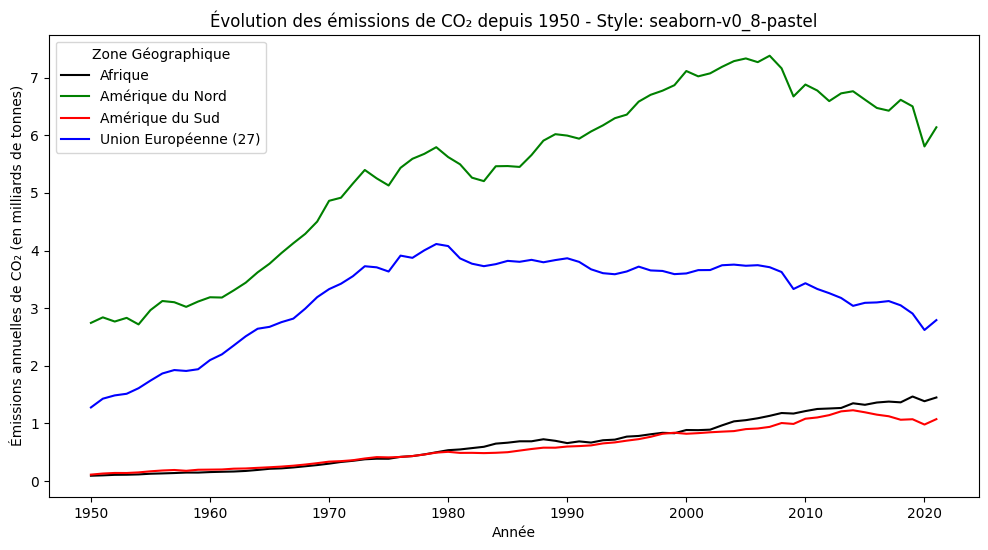

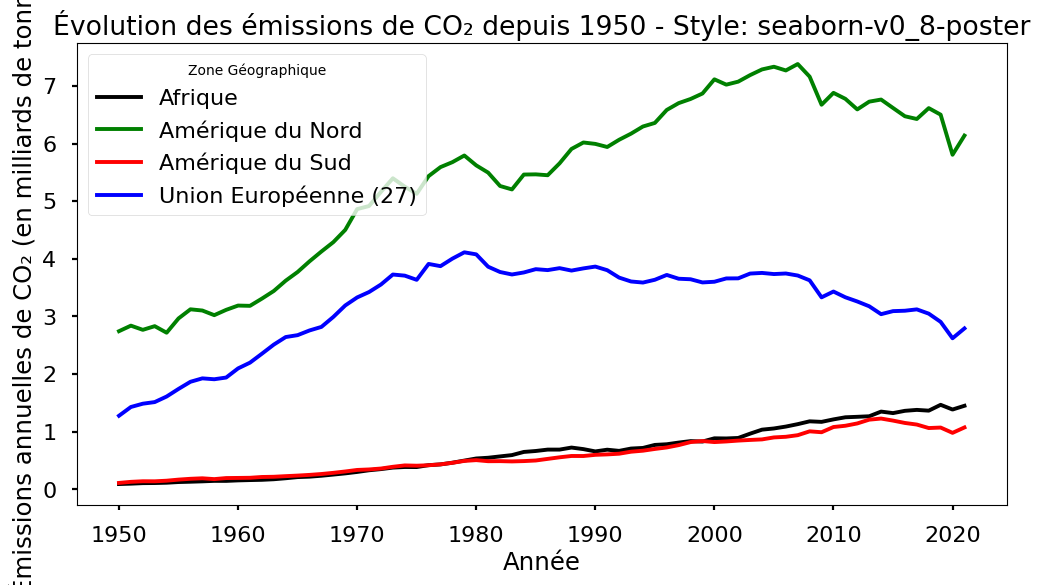

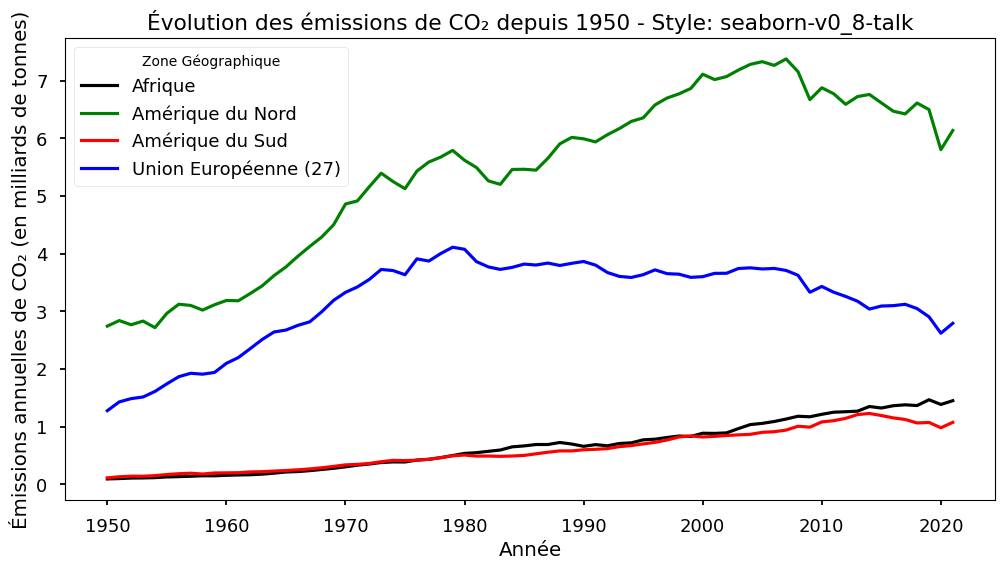

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.



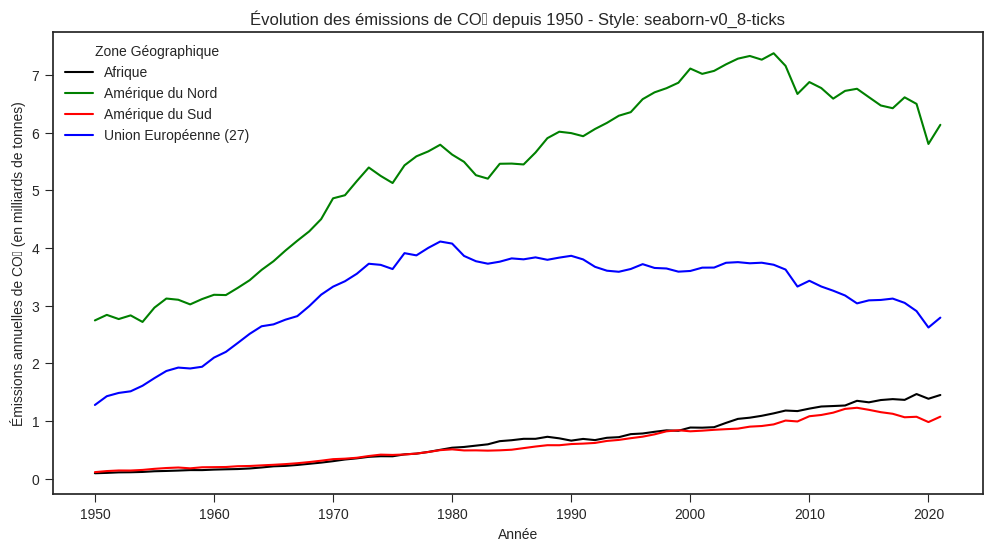

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.



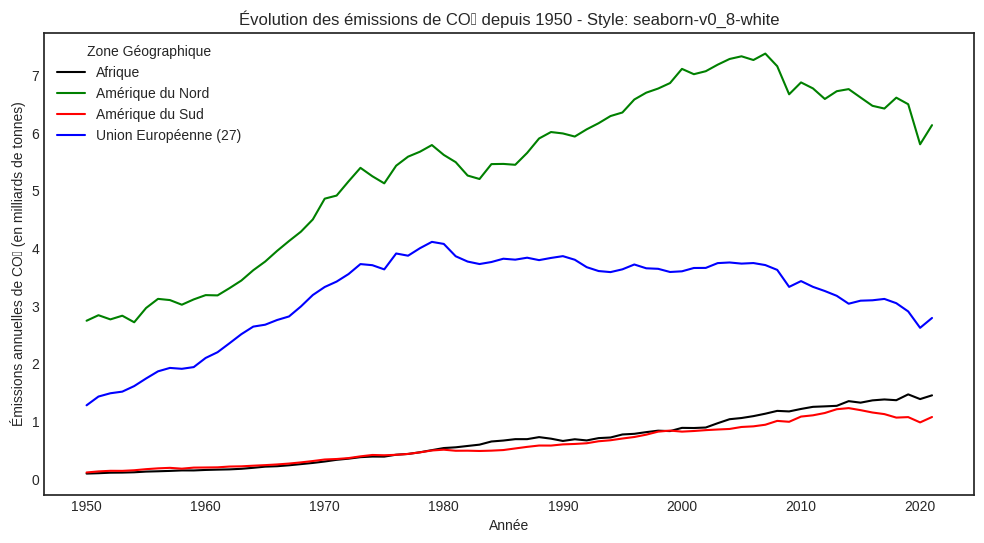

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.



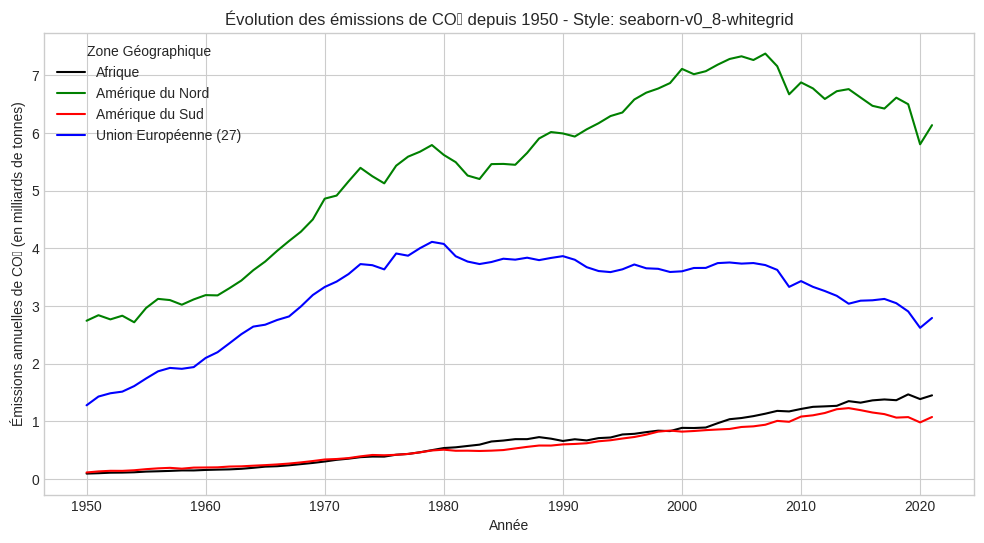

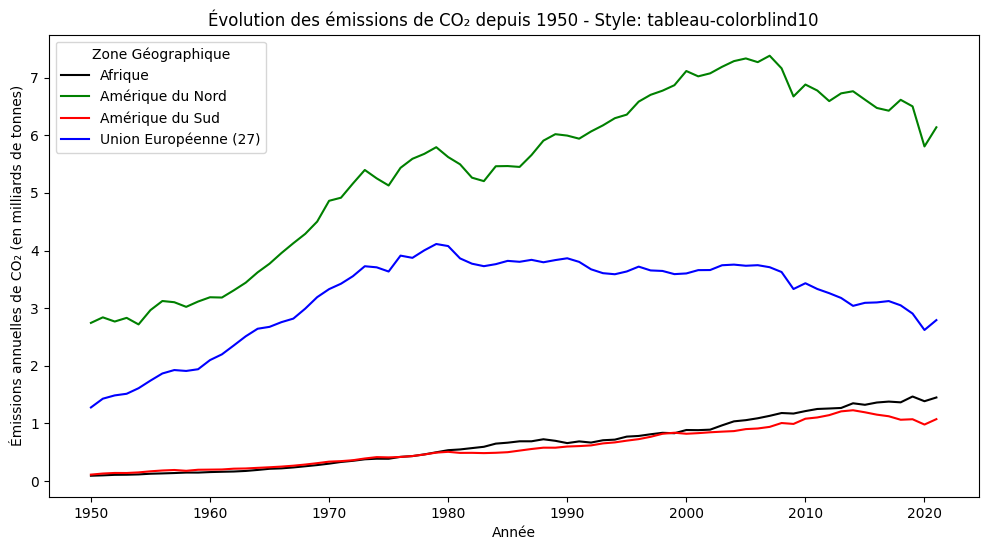

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# Charger les données depuis le fichier CSV
data = pd.read_csv(PATH_TO_CO2_FILE, delimiter=';')

# Filtrer les données pour les années depuis 1950 et pour les entités spécifiées
entities = ["Africa", "European Union (27)", "North America", "South America"]
filtered_data = data[(data['Year'] >= 1950) & (data['Entity'].isin(entities))]

# Grouper les données par année et entité
grouped_data = filtered_data.groupby(['Year', 'Entity'])['Annual CO₂ emissions'].sum().unstack()

# Définir des couleurs spécifiques pour chaque continent
colors = {"Africa": "black", "European Union (27)": "blue", "North America": "green", "South America": "red"}

# Dictionnaire de traduction pour les noms des entités
entity_translations = {
    "Africa": "Afrique",
    "European Union (27)": "Union Européenne (27)",
    "North America": "Amérique du Nord",
    "South America": "Amérique du Sud"
}

# Trier les entités par ordre alphabétique français
sorted_entities = sorted(entity_translations.keys(), key=lambda x: entity_translations[x])

# Liste de tous les styles disponibles dans Matplotlib
available_styles = plt.style.available

# Créer des graphiques avec chaque style disponible
for style in available_styles:
    with plt.style.context(style):
        plt.figure(figsize=(12, 6))
        for entity in sorted_entities:
            translated_entity = entity_translations[entity]
            plt.plot(grouped_data.index, grouped_data[entity]/1e9, label=translated_entity, color=colors[entity])

        plt.xlabel('Année')
        plt.ylabel('Émissions annuelles de CO₂ (en milliards de tonnes)')
        plt.title(f'Évolution des émissions de CO₂ depuis 1950 - Style: {style}')
        plt.legend(title='Zone Géographique')
        plt.show()
